#📌 Extracão

Nesta etapa, foram feitas as importações necessárias e os dados foram carregados a partir da fonte original. Os dados estão organizados em colunas principais e colunas aninhadas (como `customer`,` phone`, `internet`, `account`), que contêm dicionários com informações detalhadas.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
DadosTelecomX = pd.read_json(url)
DadosTelecomX.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
DadosTelecomX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#🔧 Transformação

Foi criada uma função chamada `expandir_coluna` para transformar colunas com dicionários em colunas separadas. Isso facilita o acesso às variáveis internas e permite manipulações mais diretas.

In [ ]:
# Função para converter colunas com dicionários em colunas separadas
def expandir_coluna(df, coluna):
    df_expandida = df[coluna].apply(pd.Series)
    df_expandida.columns = [f"{coluna}_{subcol}" for subcol in df_expandida.columns]
    return df_expandida


df_customer = expandir_coluna(DadosTelecomX, 'customer')
df_phone = expandir_coluna(DadosTelecomX, 'phone')
df_internet = expandir_coluna(DadosTelecomX, 'internet')
df_account = expandir_coluna(DadosTelecomX, 'account')

# Expandir a subcoluna account_Charges (que ainda é um dicionário)
df_charges = df_account['account_Charges'].apply(pd.Series)

df_account = df_account.drop(columns=['account_Charges'])

Ao final, todas as colunas expandidas foram concatenadas em um único DataFrame final, pronto para análise exploratória, modelagem ou visualizações.

In [ ]:
# 🔗 Concatenar tudo em um novo DataFrame final
df_base = DadosTelecomX.drop(columns=['customer', 'phone', 'internet', 'account'])
df_final = pd.concat([df_base, df_customer, df_phone, df_internet, df_account, df_charges], axis=1)

### 💬 Também foram renomeadas as colunas para o português, tornando os dados mais claros e acessíveis.

In [ ]:
# Renomear colunas
df_final = df_final.rename(columns={
    'customerID': 'ID_cliente',
    'Churn': 'Cancelamento',
    'customer_gender': 'Genero',
    'customer_SeniorCitizen': 'Idoso',
    'customer_Partner': 'Tem_parceiro',
    'customer_Dependents': 'Tem_dependentes',
    'customer_tenure': 'Meses_com_empresa',
    'phone_PhoneService': 'Servico_telefonico',
    'phone_MultipleLines': 'Multiplas_linhas',
    'internet_InternetService': 'Tipo_internet',
    'internet_OnlineSecurity': 'Seguranca_online',
    'internet_OnlineBackup': 'Backup_online',
    'internet_DeviceProtection': 'Protecao_aparelho',
    'internet_TechSupport': 'Suporte_tecnico',
    'internet_StreamingTV': 'Streaming_TV',
    'internet_StreamingMovies': 'Streaming_filmes',
    'account_Contract': 'Tipo_contrato',
    'account_PaperlessBilling': 'Fatura_digital',
    'account_PaymentMethod': 'Forma_pagamento',
    'Monthly': 'Valor_mensal',
    'Total': 'Valor_total'
})

### 🛠️ Padronização dos Dados
Realizou-se a padronização dos nomes das colunas e dos valores (por exemplo, "Yes"/"No" para 1/0), com o objetivo de facilitar análises estatísticas e modelagens futuras. A criação da coluna `Contas_Diarias` permitiu uma visão mais granular dos gastos mensais.

In [ ]:
# Substituir valores textuais por binários
df_final = df_final.replace({
    'Yes': 1,
    'No': 0,
    'Sim': 1,
    'Nao': 0
})

/tmp/ipython-input-3422481942.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final = df_final.replace({


In [ ]:
# Criar a coluna 'Contas_Diarias'
df_final['Contas_Diarias'] = df_final['Valor_mensal'] / 30

Foi criada a função formatar_valores() para realizar a padronização e limpeza dos dados textuais no DataFrame. Para todas as colunas do tipo texto (object)

In [ ]:
def formatar_valores(df_final):
    for coluna in df_final.columns:
        if df_final[coluna].dtype == 'object':
            df_final[coluna] = df_final[coluna].str.strip()  # remove espaços
            df_final[coluna] = df_final[coluna].str.lower()  # minúsculas
            df_final[coluna] = df_final[coluna].replace({
                '': np.nan, 'n/a': np.nan, 'null': np.nan
            })

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_cliente          7267 non-null   object 
 1   Cancelamento        7267 non-null   object 
 2   Genero              7267 non-null   object 
 3   Idoso               7267 non-null   int64  
 4   Tem_parceiro        7267 non-null   int64  
 5   Tem_dependentes     7267 non-null   int64  
 6   Meses_com_empresa   7267 non-null   int64  
 7   Servico_telefonico  7267 non-null   int64  
 8   Multiplas_linhas    7267 non-null   object 
 9   Tipo_internet       7267 non-null   object 
 10  Seguranca_online    7267 non-null   object 
 11  Backup_online       7267 non-null   object 
 12  Protecao_aparelho   7267 non-null   object 
 13  Suporte_tecnico     7267 non-null   object 
 14  Streaming_TV        7267 non-null   object 
 15  Streaming_filmes    7267 non-null   object 
 16  Tipo_c

In [ ]:
df_final.head()

,ID_cliente,Cancelamento,Genero,Idoso,Tem_parceiro,Tem_dependentes,Meses_com_empresa,Servico_telefonico,Multiplas_linhas,Tipo_internet,...,Protecao_aparelho,Suporte_tecnico,Streaming_TV,Streaming_filmes,Tipo_contrato,Fatura_digital,Forma_pagamento,Valor_mensal,Valor_total,Contas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.4,2.796667


#📊 Carga e análise

In [ ]:
# Estatísticas descritivas gerais
df_final.describe(include='all')

,ID_cliente,Cancelamento,Genero,Idoso,Tem_parceiro,Tem_dependentes,Meses_com_empresa,Servico_telefonico,Multiplas_linhas,Tipo_internet,...,Protecao_aparelho,Suporte_tecnico,Streaming_TV,Streaming_filmes,Tipo_contrato,Fatura_digital,Forma_pagamento,Valor_mensal,Valor_total,Contas_Diarias
count,7267,7267.0,7267,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.0,7267,...,7267.0,7267.0,7267.0,7267.0,7267,7267.000000,7267,7267.000000,7267,7267.000000
unique,7267,3.0,2,NaN,NaN,NaN,NaN,NaN,3.0,3,...,3.0,3.0,3.0,3.0,3,NaN,4,NaN,6531,NaN
top,9995-HOTOH,0.0,Male,NaN,NaN,NaN,NaN,NaN,0.0,Fiber optic,...,0.0,0.0,0.0,0.0,Month-to-month,NaN,Electronic check,NaN,20.2,NaN
freq,1,5174.0,3675,NaN,NaN,NaN,NaN,NaN,3495.0,3198,...,3195.0,3582.0,2896.0,2870.0,4005,NaN,2445,NaN,11,NaN
mean,NaN,NaN,NaN,0.162653,0.484106,0.300124,32.346498,0.902711,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.593230,NaN,64.720098,NaN,2.157337
std,NaN,NaN,NaN,0.369074,0.499782,0.458343,24.571773,0.296371,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.491265,NaN,30.129572,NaN,1.004319
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,18.250000,NaN,0.608333
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,9.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,35.425000,NaN,1.180833
50%,NaN,NaN,NaN,0.000000,0.000000,0.000000,29.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,70.300000,NaN,2.343333
75%,NaN,NaN,NaN,0.000000,1.000000,1.000000,55.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,89.875000,NaN,2.995833


In [ ]:
# Verificar valores ausentes
df_final.isnull().sum()

,0
ID_cliente,0
Cancelamento,0
Genero,0
Idoso,0
Tem_parceiro,0
Tem_dependentes,0
Meses_com_empresa,0
Servico_telefonico,0
Multiplas_linhas,0
Tipo_internet,0


In [ ]:
# Estatísticas descritivas específicas para colunas numéricas
df_final.select_dtypes(include=['int64', 'float64']).describe()

,Idoso,Tem_parceiro,Tem_dependentes,Meses_com_empresa,Servico_telefonico,Fatura_digital,Valor_mensal,Contas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,0.484106,0.300124,32.346498,0.902711,0.593230,64.720098,2.157337
std,0.369074,0.499782,0.458343,24.571773,0.296371,0.491265,30.129572,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.608333
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.425000,1.180833
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,2.343333
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.875000,2.995833
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,3.958333


In [ ]:
# Substitui valores vazios por np.nan e depois por 0 (ou o valor que fizer sentido para você)
df_final['Cancelamento'] = df_final['Cancelamento'].replace('', np.nan)
df_final['Cancelamento'] = df_final['Cancelamento'].fillna(0)

# Converte para inteiro
df_final['Cancelamento'] = df_final['Cancelamento'].astype(int)

# Agora calcula a contagem
cancelamento = df_final['Cancelamento'].value_counts()

# Exibir a proporção
print("Proporção de evasão:")
print(cancelamento / cancelamento.sum())

Proporção de evasão:
Cancelamento
0    0.74281
1    0.25719
Name: count, dtype: float64


/tmp/ipython-input-1759231757.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final['Cancelamento'] = df_final['Cancelamento'].replace('', np.nan)


In [ ]:
# Selecionar apenas as colunas numéricas
colunas_numericas = df_final.select_dtypes(include=['int64', 'float64'])

# Calcular média e mediana
media = colunas_numericas.mean()
mediana = colunas_numericas.median()

# Exibir resultados
print("📈 Média dos atributos numéricos:\n")
print(media)

print("\n📊 Mediana dos atributos numéricos:\n")
print(mediana)

📈 Média dos atributos numéricos:

Cancelamento           0.257190
Idoso                  0.162653
Tem_parceiro           0.484106
Tem_dependentes        0.300124
Meses_com_empresa     32.346498
Servico_telefonico     0.902711
Fatura_digital         0.593230
Valor_mensal          64.720098
Contas_Diarias         2.157337
dtype: float64

📊 Mediana dos atributos numéricos:

Cancelamento           0.000000
Idoso                  0.000000
Tem_parceiro           0.000000
Tem_dependentes        0.000000
Meses_com_empresa     29.000000
Servico_telefonico     1.000000
Fatura_digital         1.000000
Valor_mensal          70.300000
Contas_Diarias         2.343333
dtype: float64


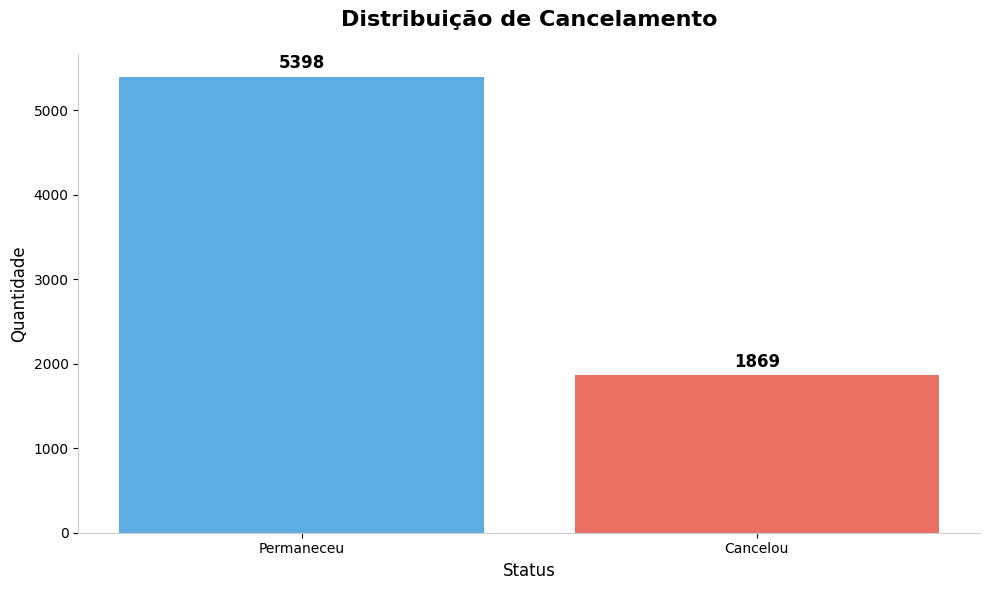

In [35]:
# Criar figura
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico de barras com estilo moderno
counts = df_final['Cancelamento'].value_counts()
bars = ax.bar(['Permaneceu', 'Cancelou'], counts.values,
              color=['#3498db', '#e74c3c'],
              alpha=0.8,
              linewidth=2)

# Customização do estilo
ax.set_title('Distribuição de Cancelamento',
             fontsize=16,
             fontweight='bold',
             pad=20)

ax.set_ylabel('Quantidade', fontsize=12)
ax.set_xlabel('Status', fontsize=12)

# Adicionar valores nas barras
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 50,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

# Remover bordas desnecessárias
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#cccccc')
ax.spines['bottom'].set_color('#cccccc')

# Ajustar layout
plt.tight_layout()
plt.show()

In [31]:
def plot_taxa_cancelamento1(df_final):
    # Variáveis a analisar (usando os nomes corretos das colunas)
    variaveis = ['Genero', 'Tipo_contrato', 'Forma_pagamento', 'Tem_dependents', 'Tipo_internet']

    # Calcular taxas de cancelamento
    dados = []
    for var in variaveis:
        # Verificar se a coluna existe
        if var not in df_final.columns:
            print(f"Aviso: Coluna '{var}' não encontrada no DataFrame")
            continue

        taxa = df_final.groupby(var)['Cancelamento'].agg(['count', 'sum']).reset_index()
        taxa['taxa'] = (taxa['sum'] / taxa['count']) * 100
        taxa['categoria'] = taxa[var].astype(str)  # Converter para string aqui
        # Substituir '0' por nome mais descritivo para Tipo_internet
        if var == 'Tipo_internet':
            taxa['categoria'] = taxa['categoria'].replace('0', 'Sem Tipo_internet')
        taxa['variavel'] = var
        dados.append(taxa[['categoria', 'taxa', 'variavel']])

    if not dados:  # Se nenhuma variável foi encontrada
        print("Erro: Nenhuma das variáveis especificadas foi encontrada no DataFrame")
        return

    resumo = pd.concat(dados, ignore_index=True).sort_values('taxa')

    # Encontrar destaque (maior taxa)
    destaque = resumo.iloc[-1]

    # Plot
    fig, ax = plt.subplots(figsize=(12, 8))  # Aumentar tamanho para acomodar texto

    # Criar paleta de cores
    colors = sns.color_palette("dark:#5A9_r", n_colors=len(resumo))
    bars = ax.barh(resumo['categoria'], resumo['taxa'], color=colors)

    # Texto nas barras
    for bar, taxa in zip(bars, resumo['taxa']):
        ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
                f'{taxa:.2f}%', va='center', ha='left', fontsize=10, fontweight='bold')

    # Texto explicativo no lado esquerdo
    destaque_texto = (
        f"{destaque['taxa']:.2f}% dos cancelamentos ocorreram na categoria "
        f"'{destaque['categoria']}' ({destaque['variavel']}).\n"
        "Essa categoria representa a maior taxa entre todas as avaliadas."
    )
    ax.text(0.40, 0.25, destaque_texto, transform=ax.transAxes, ha='left', va='bottom',
            fontsize=10, color='white', bbox=dict(boxstyle="round,pad=0.3",
            facecolor='#232625', edgecolor='gray', alpha=0.9))

    # Título e eixos
    ax.set_title('Taxa de Cancelamento por Categoria', fontsize=14, weight='bold', pad=20)
    ax.set_xlabel('Taxa (%)')
    ax.set_ylabel('')
    ax.set_xlim(0, resumo['taxa'].max() + 10)
    ax.spines[['top', 'right']].set_visible(False)

    plt.tight_layout()  # Remove o rect que deixava espaço no topo

Aviso: Coluna 'Tem_dependents' não encontrada no DataFrame


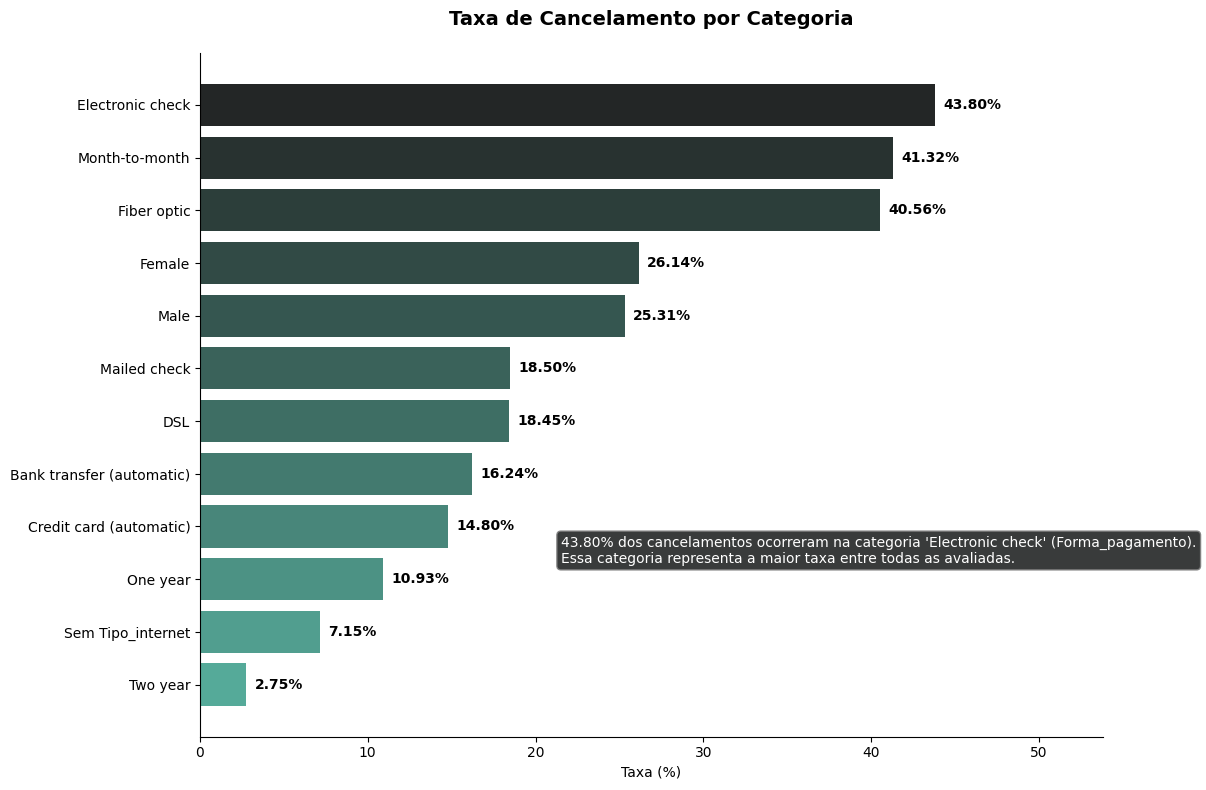

In [32]:
plot_taxa_cancelamento1(df_final)

In [ ]:
# Lista das variáveis numéricas
variaveis_numericas = ["Valor_total", "Meses_com_empresa"]

# Criando os gráficos interativos
for var in variaveis_numericas:
    fig = px.box(
        df_final,
        x="Cancelamento",
        y=var,
        color="Cancelamento",
        points="all",  # Mostra todos os pontos além do boxplot
        title=f"Relação entre Cancelamento e Variáveis Numéricas",
        labels={"Cancelamento": "Status", var: var},
        color_discrete_sequence=px.colors.qualitative.Set2
    )
    fig.update_layout(
        xaxis_title="Status de Cancelamento",
        yaxis_title=var,
        legend_title="Cancelamento",
        template="plotly_white"
    )
fig.show()

#📄Relatorio Final

# Relatório de Análise de Cancelamento – Telecom X
### 1. Introdução 📝

O objetivo desta análise é entender os motivos por trás da alta taxa de cancelamento de clientes da empresa Telecom X, uma operadora de telecomunicações. O cancelamento impacta diretamente a receita e o crescimento da empresa, por isso é essencial identificar padrões e fatores que influenciam essa saída para desenvolver estratégias eficazes de retenção.


---


### 2. Limpeza e Tratamento de Dados 🧹

* Os dados foram importados de uma API disponibilizada via repositório GitHub.

* Realizamos a desnormalização dos dados que estavam em formato de dicionários aninhados, transformando-os em um DataFrame plano e utilizável.

* Identificamos e tratamos valores ausentes (NaN), inconsistências e duplicidades para garantir a qualidade da base.

* Padronizamos os nomes das colunas para português e ajustamos os tipos das variáveis, convertendo valores categóricos ("Sim", "Não") para binários (1 e 0).

* Criamos uma coluna calculada chamada "Contas_Diarias" para representar o faturamento diário a partir do faturamento mensal.

---
### 3. Análise Exploratória de Dados (EDA) 🔍

1. Distribuição do Cancelamento

* Visualizamos a proporção de clientes que permaneceram e que cancelaram, confirmando que o cancelamento é significativo.

* Gráficos de barras foram usados para facilitar a compreensão visual da rotatividade.

2. Cancelamento por Variáveis Categóricas

* Clientes do sexo feminino apresentaram uma taxa de cancelamento ligeiramente maior que os masculinos.

* Contratos do tipo mensal têm mais cancelamentos do que os anuais ou por bens.

* Métodos de pagamento automáticos apresentaram menor churn comparados aos métodos manuais.

* Clientes sem serviço de telefone ou com certos tipos de serviço de internet apresentaram variações na taxa de cancelamento.

3. Cancelamento por Variáveis Numéricas

* Clientes que cancelam apresentam, em média, um tempo de serviço menor, indicando cancelamento precoce.

* O gasto total dos clientes que saíram tende a ser menor, sugerindo que clientes de menor valor são mais propensos ao cancelamento.

* A dispersão e outliers indicam casos atípicos que podem demandar análise individualizada.

---
###4. Conclusões e Insights 💡

* A maior taxa de cancelamento ocorre entre clientes com contratos mensais, tempo de serviço curto e menor gasto total.

* Clientes com métodos de pagamento automáticos tendem a cancelar menos, indicando maior conveniência e fidelidade.

* A segmentação por sexo e tipo de serviço revela variações que podem ser exploradas para campanhas específicas.

* Identificar clientes com tempo curto de serviço e baixo gasto pode ajudar a direcionar ações de retenção antes do cancelamento.

---

###5. Recomendações 📈
* Incentivar contratos de maior prazo ou planos anuais para reduzir o churn.

* Promover e facilitar métodos de pagamento automáticos para aumentar a retenção.

* Criar campanhas específicas para o público feminino, com foco em melhorar o engajamento.

* Monitorar clientes novos e de baixo gasto para oferecer vantagens ou suporte especial, evitando cancelamentos precoces.

* Analisar casos atípicos de clientes com gastos e tempo fora da média para entender e mitigar riscos.

**Note:** To fix the `NameError: name 'df_final' is not defined`, please run all the preceding code cells that create and process the `df_final` DataFrame before executing the plotting code. These include the cells in the "Extracão" and "Transformação" sections.